In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import warnings
warnings.filterwarnings("ignore")

In [7]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

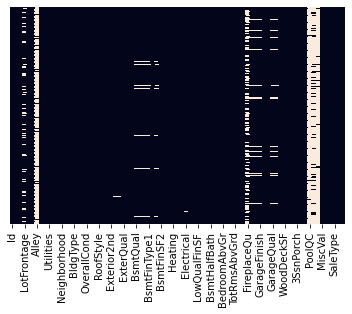

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
null_vars = [var for var in df.columns if df[var].isnull().sum() >0 ]

In [10]:
null_vars

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

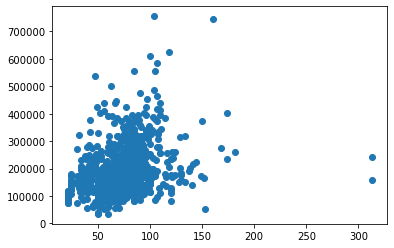

In [13]:
plt.scatter(df["LotFrontage"],df["SalePrice"])

In [14]:
df.groupby(df["LotFrontage"]>65)["SalePrice"].mean()

LotFrontage
False    161339.273973
True     204854.656012
Name: SalePrice, dtype: float64

In [15]:
num_null_vars = [feature for feature in df.columns if df[feature].dtype!="O" and df[feature].isnull().sum()>0]
num_null_vars

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
# temp = 0
# for i,var in enumerate(df["LotFrontage"]) :
#     if df["LotFrontage"].isnull()[i] :
#         if df["SalePrice"][i]>200000 :
#             df["LotFrontage"] = df["LotFrontage"].mean()
#         else :
#             df["LotFrontage"] = df["LotFrontage"].mode()
            
# df["LotFrontage"]
            
        

In [17]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])

In [18]:
df['LotFrontage'].isnull().sum()

0

In [19]:
df.drop(['Alley'],axis=1,inplace=True)

In [20]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [21]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [22]:
# df.drop(['GarageYrBlt'],axis=1,inplace=True)
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [23]:
df['GarageYrBlt'].isnull().sum()

0

In [24]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [25]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [26]:
df.shape

(1460, 77)

In [27]:
df.drop(['Id'],axis=1,inplace=True)

In [28]:
df.shape

(1460, 76)

In [29]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

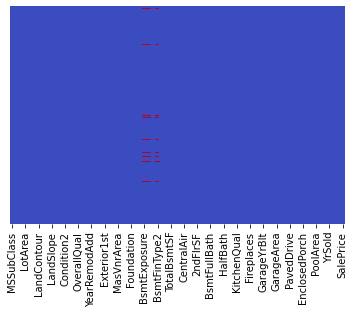

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [31]:
print(df['BsmtExposure'].isnull().sum())
print(df['BsmtFinType2'].isnull().sum())

38
38


In [32]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [33]:
df.shape

(1460, 76)

<AxesSubplot:>

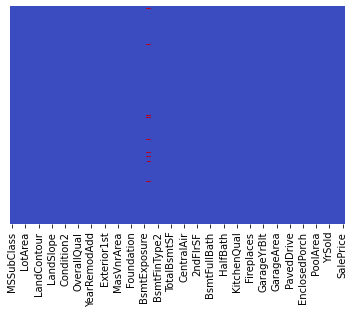

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [35]:
null_vars1 = [var for var in df.columns if df[var].isnull().sum() >0 ]
null_vars1

['BsmtFinType1', 'Electrical']

In [36]:
print(df['BsmtFinType1'].isnull().sum())
print(df['Electrical'].isnull().sum())

37
1


In [37]:
df["BsmtFinType1"].dtype,df["Electrical"].dtype

(dtype('O'), dtype('O'))

In [38]:
# df.dropna(inplace=True)
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [39]:
# temporal variables(date time columns)

for feature in ["YearBuilt","YearRemodAdd","GarageYrBlt"] :
    df[feature] = df["YrSold"] - df[feature]

In [40]:
df.shape

(1460, 76)

In [41]:
df.isnull().sum().sum()

0

In [57]:
##Handle Categorical Features

In [42]:
## categorical columns
cat_columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [43]:
len(cat_columns)

39

In [44]:
temp=0
for var in cat_columns :
    temp = temp + len(df[var].unique())
    #print(len(df[var].unique()))
    #print()
print(temp)

239


In [45]:
# df4 = pd.get_dummies(df,drop_first = True)
# df4.shape

In [46]:
#we will make funtion (upper  row has method that was also correct for onrhotencoding) 

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [47]:
main_df=df.copy()

In [48]:
## Combine Test Data  into train data

test_df=pd.read_csv('formulated_test1.csv')

In [49]:
test_df.shape

(1459, 75)

In [51]:
final_df=pd.concat([df,test_df],axis=0) # combine rowwise (train and test data)
# test datat dont have salesprice columns so NAN value will come

In [52]:
final_df["SalePrice"].isnull().sum()

1459

In [54]:
final_df["SalePrice"].fillna(0, inplace = True)

In [55]:
final_df["SalePrice"].isnull().sum()

0

In [56]:
for feature in cat_columns:
    labels_ordered=final_df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered)}
    final_df[feature]=final_df[feature].map(labels_ordered)

In [57]:
final_df.shape

(2919, 76)

In [58]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
39       82000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780

In [70]:
#final_df=category_onehot_multcols(cat_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [59]:
#final_df =final_df.loc[:,~final_df.columns.duplicated()]
# remove duplicate columns (duplicate means they are internally correlated)

In [60]:
final_df.shape

(2919, 76)

In [61]:
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,1,0,1,0,18,5,3,4,6,7,5,5,5,1,1,10,11,2,196.0,2,4,5,2,2,0,5,706.0,5,0.0,150.0,856.0,3,4,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,5,0,2,4,5.0,1,2.0,548.0,2,3,2,0,61,0,0,0,0,0,2,2008,4,4,208500.0
1,20,3,80.0,9600,1,0,1,0,3,0,17,2,3,4,5,6,8,31,31,1,1,5,3,0,0.0,1,4,2,2,2,3,3,978.0,5,0.0,284.0,1262.0,3,4,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,5,1,3,4,31.0,1,2.0,460.0,2,3,2,298,0,0,0,0,0,0,5,2007,4,4,181500.0
2,60,3,68.0,11250,1,1,1,0,1,0,18,5,3,4,6,7,5,7,6,1,1,10,11,2,162.0,2,4,5,2,2,1,5,486.0,5,0.0,434.0,920.0,3,4,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,5,1,3,4,7.0,1,2.0,608.0,2,3,2,0,42,0,0,0,0,0,9,2008,4,4,223500.0
3,70,3,60.0,9550,1,1,1,0,2,0,14,5,3,4,6,7,5,91,36,1,1,6,5,0,0.0,1,4,1,1,3,0,3,216.0,5,0.0,540.0,756.0,3,3,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,5,1,2,2,8.0,0,3.0,642.0,2,3,2,0,35,272,0,0,0,0,2,2006,4,2,140000.0
4,60,3,84.0,14260,1,1,1,0,3,0,24,5,3,4,6,8,5,8,8,1,1,10,11,2,350.0,2,4,5,2,2,2,5,655.0,5,0.0,490.0,1145.0,3,4,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,5,1,3,4,8.0,1,3.0,836.0,2,3,2,192,84,0,0,0,0,0,12,2008,4,4,250000.0


In [62]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [63]:
df_Train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,1,0,1,0,18,5,3,4,6,7,5,5,5,1,1,10,11,2,196.0,2,4,5,2,2,0,5,706.0,5,0.0,150.0,856.0,3,4,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,5,0,2,4,5.0,1,2.0,548.0,2,3,2,0,61,0,0,0,0,0,2,2008,4,4,208500.0
1,20,3,80.0,9600,1,0,1,0,3,0,17,2,3,4,5,6,8,31,31,1,1,5,3,0,0.0,1,4,2,2,2,3,3,978.0,5,0.0,284.0,1262.0,3,4,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,5,1,3,4,31.0,1,2.0,460.0,2,3,2,298,0,0,0,0,0,0,5,2007,4,4,181500.0
2,60,3,68.0,11250,1,1,1,0,1,0,18,5,3,4,6,7,5,7,6,1,1,10,11,2,162.0,2,4,5,2,2,1,5,486.0,5,0.0,434.0,920.0,3,4,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,5,1,3,4,7.0,1,2.0,608.0,2,3,2,0,42,0,0,0,0,0,9,2008,4,4,223500.0
3,70,3,60.0,9550,1,1,1,0,2,0,14,5,3,4,6,7,5,91,36,1,1,6,5,0,0.0,1,4,1,1,3,0,3,216.0,5,0.0,540.0,756.0,3,3,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,5,1,2,2,8.0,0,3.0,642.0,2,3,2,0,35,272,0,0,0,0,2,2006,4,2,140000.0
4,60,3,84.0,14260,1,1,1,0,3,0,24,5,3,4,6,8,5,8,8,1,1,10,11,2,350.0,2,4,5,2,2,2,5,655.0,5,0.0,490.0,1145.0,3,4,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,5,1,3,4,8.0,1,3.0,836.0,2,3,2,192,84,0,0,0,0,0,12,2008,4,4,250000.0


In [64]:
df_Test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,2,80.0,11622,1,0,1,0,1,0,10,2,3,4,5,5,6,49,49,1,1,10,11,0,0.0,1,4,2,1,2,0,0,468.0,4,144.0,270.0,882.0,3,2,1,4,896,0,0,896,0.0,0.0,1,0,2,1,1,5,5,0,2,4,49.0,0,1.0,730.0,2,3,2,140,0,0,0,120,0,0,6,2010,4,4,0.0
1,20,3,81.0,14267,1,1,1,0,2,0,10,5,3,4,5,6,6,52,52,3,1,6,4,2,108.0,1,4,2,1,2,0,3,923.0,5,0.0,406.0,1329.0,3,2,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,5,0,2,4,52.0,0,1.0,312.0,2,3,2,393,36,0,0,0,0,12500,6,2010,4,4,0.0
2,60,3,74.0,13830,1,1,1,0,1,0,13,5,3,4,6,5,5,13,12,1,1,10,11,0,0.0,1,4,5,2,2,0,5,791.0,5,0.0,137.0,928.0,3,3,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,1,6,5,1,3,4,13.0,2,2.0,482.0,2,3,2,212,34,0,0,0,0,0,3,2010,4,4,0.0
3,60,3,78.0,9978,1,1,1,0,1,0,13,5,3,4,6,6,6,12,12,1,1,10,11,2,20.0,1,4,5,1,2,0,5,602.0,5,0.0,324.0,926.0,3,4,1,4,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,5,1,2,4,12.0,2,2.0,470.0,2,3,2,360,36,0,0,0,0,0,6,2010,4,4,0.0
4,120,3,43.0,5005,1,1,2,0,1,0,23,5,3,3,5,8,5,18,18,1,1,7,6,0,0.0,2,4,5,2,2,0,3,263.0,5,0.0,1017.0,1280.0,3,4,1,4,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,5,0,2,4,18.0,1,2.0,506.0,2,3,2,0,82,0,0,144,0,0,1,2010,4,4,0.0


In [65]:
df_Train.shape

(1460, 76)

In [66]:
df_Test.shape

(1459, 76)

In [67]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [68]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Predction and Selecting Algorithm

In [69]:
import xgboost
regressor=xgboost.XGBRegressor()

In [70]:
booster=["gbtree","gblinear"]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

In [71]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
random_cv = RandomizedSearchCV(estimator=regressor,param_distributions=hyperparameter_grid,
                              cv=5,n_iter=50,
                              scoring="neg_mean_absolute_error",n_jobs=4,
                              verbose=5,return_train_score=True,
                              random_state=42)

In [74]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  9.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 14.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [75]:
random_cv.best_estimator_


XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=np.nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
df_Test.shape

(1459, 75)

In [79]:
y_pred=regressor.predict(df_Test)

In [80]:
y_pred

array([129872.555, 155120.95 , 190722.44 , ..., 160817.92 , 114485.516,
       196422.14 ], dtype=float32)

In [81]:
##Create Sample Submission file and Submit using XGBoost
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_4.csv',index=False)